In [99]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [153]:
df=pd.read_csv("banglore_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [154]:
# 1st we have to drop some columns which is not necessary for model 
df1=df.drop(['area_type','availability','society','balcony'], axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [155]:
# checking for null values in data set  
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [156]:
# here create new data frame which have no null values 
df2=df1.dropna()
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [157]:
# here we can see that there are some bedrooms and BHK , but this is same thing so we have to create another columns to manage this error
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [158]:
# here create new columns taking 1st value from size columns which is number 
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

In [159]:
# now we have bhk column which have no of bedrooms 
df2

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [160]:
# we have to drop size columns 
df2.drop(['size'],axis='columns', inplace=True)

In [161]:
df2

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [162]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [163]:
# now dealing with total_sqft 
df2['total_sqft'].unique()
# here we can see that there is also number of ranges so we have to handle it 

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [164]:
# creating float function which return range values 
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [165]:
# it returns those values whose value is in range 
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [166]:
# we have to change these range values in float 
# so we create a function which converts these values 
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [167]:
convert_sqft_to_num('2100-2850')

2475.0

In [168]:
# Applying convert function on total_sqft_column
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)
df3

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [169]:
df3.loc[30] # here we can see that data has been modified

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

# now Lets do some feature engineering

In [170]:
# creating a new data frame from df3
df4=df3.copy()

In [171]:
# let create another columns price per sqft 
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']

In [172]:
df4

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [173]:
# now lets deal with location column 
# this columns contains string we have use one hot encoding but there are 1304 row it means it will create 1304 columns which is not good 
# so we have to check those whose number is less
len(df4['location'].unique())

1304

In [174]:
# lets see All locations 
df4.location=df4.location.apply(lambda x: x.strip()) # remove all space in the end 

location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats
# here we can see that there is alot of rows who have only one value 

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [175]:
len(location_stats[location_stats<10])

location_stats_less_than_10 = location_stats[location_stats<10]
location_stats_less_than_10
# here are 1039 rows whose values is less then 10

location
2nd Phase JP Nagar       9
Volagerekallahalli       9
Yemlur                   9
4th Block Koramangala    9
Lingarajapuram           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Karnataka Shabarimala    1
whitefiled               1
Name: location, Length: 1039, dtype: int64

In [176]:
# now we are converting these location to others 
df4.location = df4.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)

In [177]:
len(df4.location.unique())

255

In [178]:
df4 # here we can see that we have changed locations into others 

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,other,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


# now lets find and remove outliers

In [179]:
# lets see total sqft and bhk that meets their requirements or not 
# because less sqft has not to be more bedrooms so we have to find that values which have low sqft and greater no of bhk
df4[df4.total_sqft/df4.bhk<300].head()
# so these are outliers we have to remove it 

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [180]:
df5=df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12502, 6)

In [181]:
# now lets deal with price_per_sqft 
df5.price_per_sqft.describe()
# here we can see that min value is 267 and max is 176370 
# so apply statictics to remove these outliers 

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [182]:
# creating  function which will remove outliers from price per sqft 
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'): # taking subdf for each location 
        m=np.mean(subdf.price_per_sqft)      # find mean of price_per_sqft
        s=np.std(subdf.price_per_sqft)       # find std of price_per_sqft
        reduced_df=subdf[(subdf.price_per_sqft > (m-s)) & (subdf.price_per_sqft <=(m+s))] # df contains correct values 
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
    

In [183]:
df6=remove_pps_outliers(df5)

In [184]:
df6.shape
# here we have remove outliers for price per_sqft

(10222, 6)

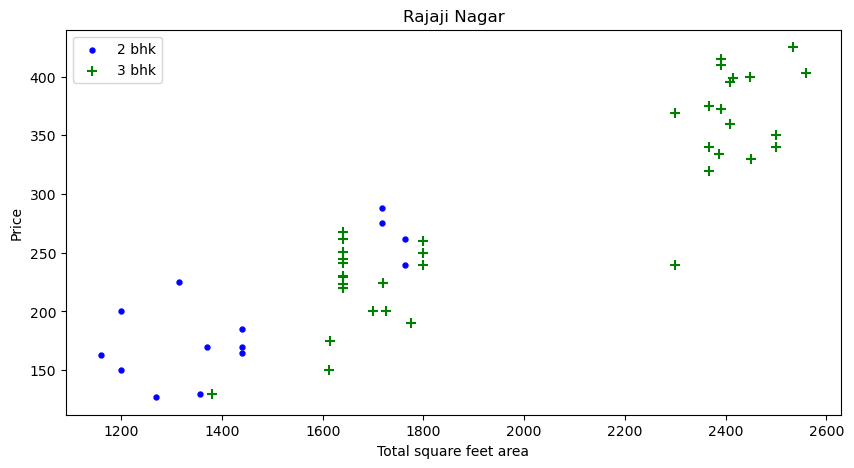

In [185]:
# now Dealing with price of those locations whose 2 bhk price is higher then 3 bhk 
# 1st we have to plot scatter to know about outliers 
# for that scatter we are creating a function 
import matplotlib
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(10,5)
    plt.scatter(bhk2.total_sqft,bhk2.price, color='blue', marker='.', label='2 bhk', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price, color='green', marker='+', label='3 bhk', s=50)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,'Rajaji Nagar')
# here we can see that there is alot of price of bhk 2 is greater than bhk 3 

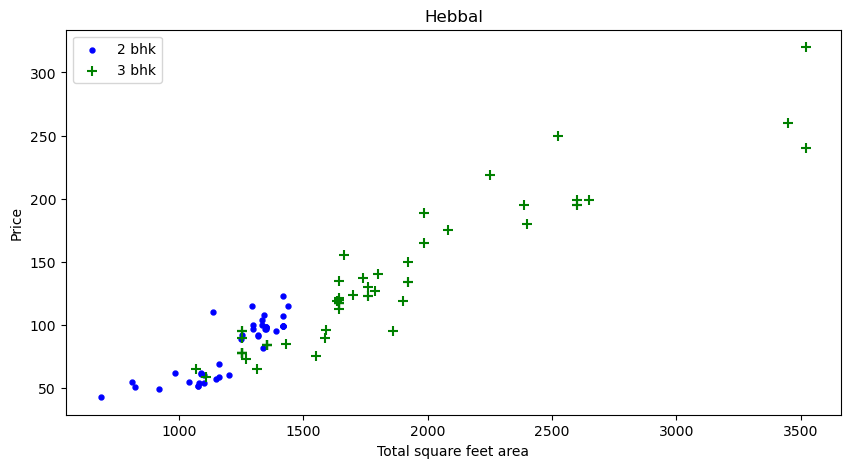

In [186]:
# scatter plot for another location 
plot_scatter_chart(df6,'Hebbal')

In [187]:
### now we should also remove properties where the price of 2 bhk is higher than 3 bhk ( with same sqft area )
#### we will build a dictionary for of stats per bhk 

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
            'mean':np.mean(bhk_df.price_per_sqft),
            'std':np.std(bhk_df.price_per_sqft),
            'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices= np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df7=remove_bhk_outliers(df6)

In [188]:
df7.shape

(7369, 6)

In [189]:
df6.shape

(10222, 6)

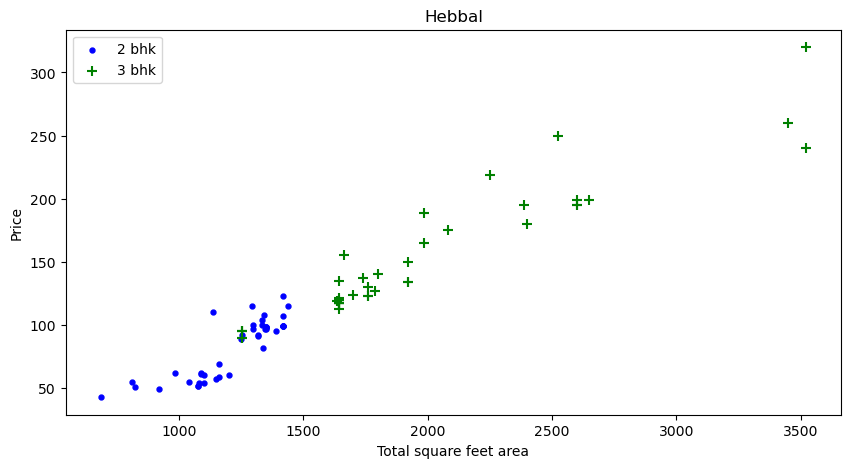

In [190]:
# here we can notice that our data set is improving 
plot_scatter_chart(df7,'Hebbal')

# now lets plot histogram chart against price per sqft

Text(0, 0.5, 'count')

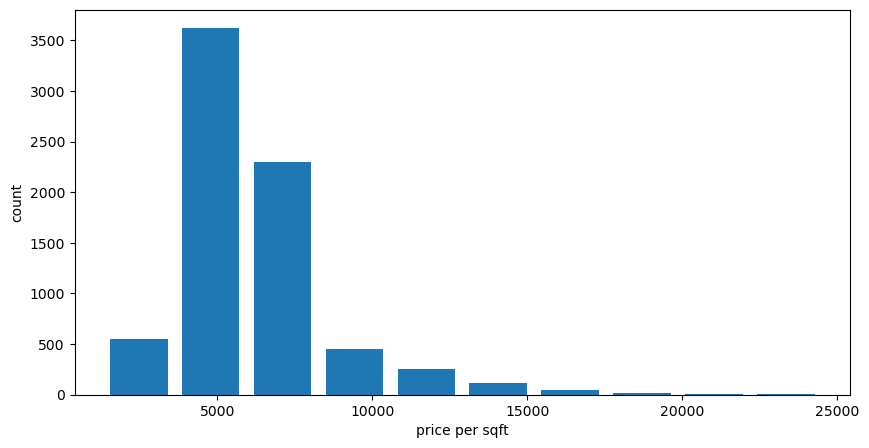

In [191]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(10,5)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("price per sqft")
plt.ylabel("count")

# here we can see that majority is from 0 to 10000 sqft 

# now lets deal with bathroom column

In [192]:
# lets see unique values 
df7.bath.unique()

# here we can see that there are some properties which have greater number of bathrooms we have to find them 

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [193]:
df7[df7.bath>10] # here are those whose bath greater than 10 

,location,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
5344,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8547,other,12000.0,12.0,525.0,10,4375.000000
8633,other,10000.0,16.0,550.0,16,5500.000000
9329,other,6000.0,12.0,150.0,11,2500.000000
9642,other,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

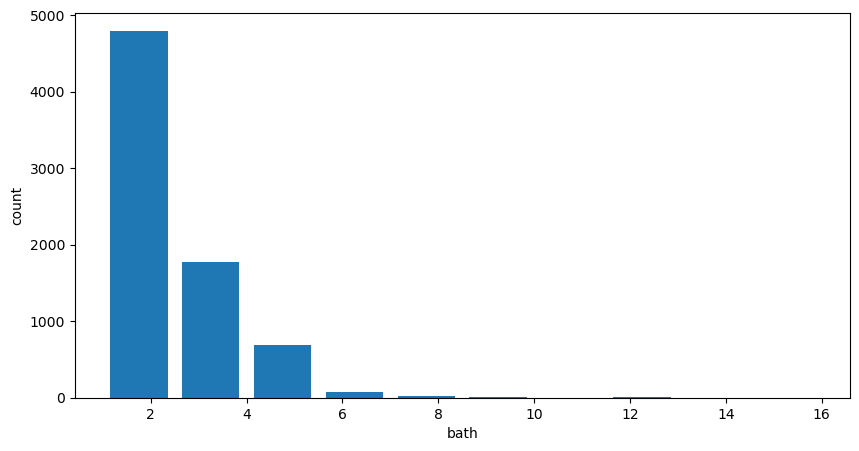

In [194]:
# some properties may have equal no of bathrooms as bedrooms but not greater than that so we use this concept to remove bathroom outliers 
# lets 1st plot histogram chart 
matplotlib.rcParams['figure.figsize']=(10,5)
plt.hist(df7.bath, rwidth=0.8)
plt.xlabel('bath')
plt.ylabel('count')

In [195]:
# now lets remove bath outliers 
df7[df7.bath > df7.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
585,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
1642,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5305,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6792,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8476,other,11338.0,9.0,1000.0,6,8819.897689


In [196]:
# now creating new data frame 
df8=df7[df7.bath < df7.bhk+2]
df8

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...
10213,other,1200.0,2.0,70.0,2,5833.333333
10214,other,1800.0,1.0,200.0,1,11111.111111
10217,other,1353.0,2.0,110.0,2,8130.081301
10218,other,812.0,1.0,26.0,1,3201.970443


In [197]:
# now we have complete data set which have no outliers so we have to remove price per sqft column, because we dont need it 
df8.drop('price_per_sqft', axis='columns', inplace=True)

In [198]:
df8 # this our final data which we will  use for build machine learning model 

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10213,other,1200.0,2.0,70.0,2
10214,other,1800.0,1.0,200.0,1
10217,other,1353.0,2.0,110.0,2
10218,other,812.0,1.0,26.0,1


# now its time to train model on different regression models 

In [199]:
# there is text data in location
# so we have to change it into numbers using one hot encoding 
dummies=pd.get_dummies(df8.location)
# now creating new Data Frame which have these columns 
df9=pd.concat([df8,dummies.drop('other',axis='columns')],axis='columns')
# now we have to drop location
df10=df9.drop('location', axis='columns')
df10

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10214,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10217,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10218,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
# first we have to set x and y 

x=df10.drop(['price'], axis='columns')
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
# now setting y 
y=df10.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [202]:
# now use train test split method 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)


In [203]:
# now 1st we use linear regression to train model 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

# its giving 85% accuracy

0.8514642713738957

In [204]:
# but we have to try different models to get best score 
# for that using KFold cross validation
from sklearn.model_selection import ShuffleSplit # this will shuffle for give randomize sample 
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x,y,cv=cv)
# its giving 5 different scores we can take average out from them 

array([0.84196276, 0.82904236, 0.90136194, 0.85131228, 0.84354632])

In [205]:
# now we are using GridSearchCV to try different models and see their scorefrom 
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# now creating a function which will use GridSearch cv
def find_best_model_using_gridsearchcv(x,y):
    algos ={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'Lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'Decission_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs=GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
        

In [206]:
# find_best_model_using_gridsearchcv(x,y)
# here we can see that linear_regression is giving best score 

In [207]:
x.columns
np.where(x.columns=='1st Block Jayanagar')[0][0] # this code return index of that location columns 

3

In [208]:
# now lets create a prediction function becasue there are more than 200 locations 
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    X=np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=bhk
    if loc_index >=0:
        X[loc_index]=1
    return lr.predict([X])[0]
    

In [209]:
predict_price('1st Phase JP Nagar',1000,2,2)

87.8030762372147

In [210]:
predict_price('1st Phase JP Nagar',1000,3,3)

91.07013971676618

In [211]:
predict_price('Indira Nagar',1000,2,2)

188.90770076907344

# we have trained model now we will save it using pickle

In [212]:
import pickle

with open('banglore_home_price_prediction','wb') as f:
    pickle.dump(lr,f)

In [213]:
# there are capital letters in data so we have to write json file to change them lower case 
import json
columns={
    'data_columns':[col.lower() for col in x.columns]
}

with open('columns.json','w') as f:
    f.write(json.dumps(columns))